# Jonathan Bunch

19 September 2021

Bellevue University

DSC550-T301

---

# Week 3 Exercises: Plotting with matplotlib

I chose to use data from the Organization for Economic Cooperation and Development regarding pharmaceutical spending
and suicide rates for a number of countries over a number of years.  Since the data manipulation/analysis were not the
focus this week, I simply aggregated the data into average values for each country over whichever years had data.

In [5]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data sets.
pharma_raw = pd.read_csv('pharma_sales_data.csv')
suicide_raw = pd.read_csv('suicide_data.csv')
# pharma_raw = pd.read_csv('week-3/pharma_sales_data.csv')
# suicide_raw = pd.read_csv('week-3/suicide_data.csv')

# Group the data by country using mean as the aggregating function. This will aggregate the yearly values into a single
# mean value for each country.
pharma1 = pharma_raw.groupby(['LOCATION']).mean()
su1 = suicide_raw.groupby(['LOCATION']).mean()

# Drop irrelevant columns and rename the relevant ones.
pharma2 = pharma1.drop(columns=['TIME', 'TOTAL_SPEND', 'PC_GDP', 'PC_HEALTHXP'])
pharma2 = pharma2.rename(columns={'USD_CAP': 'usd_per_cap'})
su2 = su1.drop(columns=['TIME']).rename(columns={'Value': 'suicide_rate'})

# Join the two data sets using the location. Using left join will drop the few countries that are not represented
# in the suicide data set.
df = pharma2.join(su2)
df.head()

,usd_per_cap,suicide_rate
LOCATION,,
AUS,238.668023,13.522989
AUT,386.203692,22.206111
BEL,292.560878,19.430994
CAN,313.337778,12.751149
CHE,439.933710,20.147701


## Plot 1: Scatter Plot

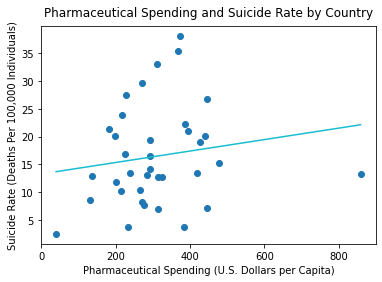

In [2]:
# Create the scatter plot from the pharmaceutical spending and suicide rate data.
plt.scatter('usd_per_cap', 'suicide_rate', data=df)
# Add a title and axis labels.
plt.title('Pharmaceutical Spending and Suicide Rate by Country', pad=10, fontsize=12)
plt.xlabel('Pharmaceutical Spending (U.S. Dollars per Capita)')
plt.ylabel('Suicide Rate (Deaths Per 100,000 Individuals)')
# Add a best fit line.
plt.plot(np.unique(df.usd_per_cap),
         np.poly1d(np.polyfit(df.usd_per_cap, df.suicide_rate, 1))(np.unique(df.usd_per_cap)), color='C9')
plt.show()

## Plot 2: Bar Plot

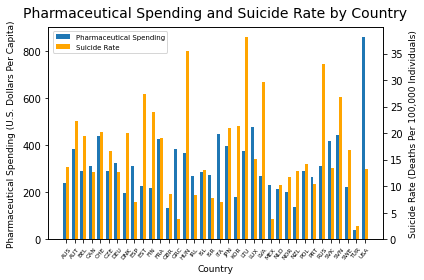

In [9]:
# I will start by creating some helper variables for organizing the plot.
x = np.arange(len(df))
width = 0.35
fig, ax = plt.subplots()
# Plot the bars for pharma spending.
ax.bar(x, df.usd_per_cap, width)
# I plotted my second variable on a new axis since the two variables have different scales.
ax2 = ax.twinx()
ax2.bar(x + width, df.suicide_rate, width, color='orange')
# Add ticks, title, and labels.
ax.set_xticks(x + width / 2)
ax.set_xticklabels(list(df.index), fontsize=6, rotation=50)
ax.set_xlabel("Country", labelpad=4, fontsize=9)
ax.set_ylabel("Pharmaceutical Spending (U.S. Dollars Per Capita)", labelpad=6, fontsize=9)
ax2.set_ylabel("Suicide Rate (Deaths Per 100,000 Individuals)", labelpad=6, fontsize=9)
ax.set_title('Pharmaceutical Spending and Suicide Rate by Country', pad=10, fontsize=14)
# Add a legend using some shortened versions of the labels.
fig.legend(['Pharmaceutical Spending', 'Suicide Rate'], fontsize=7, loc=(0.125, 0.81))
fig.set_tight_layout(tight=True)
plt.show()

## Plot 3: Line Plot

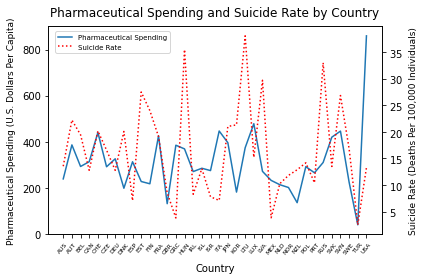

In [6]:
fig, ax = plt.subplots()
# Plot the first variable on one axis.
ax.plot(df.index, 'usd_per_cap', linestyle='solid', data=df)
ax.set_xticks(np.arange(len(df)))
# Add labels.
ax.set_xticklabels(list(df.index), fontsize=6, rotation=50)
ax.set_ylabel("Pharmaceutical Spending (U.S. Dollars Per Capita)", labelpad=6, fontsize=9)
ax.set_xlabel("Country", labelpad=8)
# Repeat for the second variable.
ax2 = ax.twinx()
ax2.plot(df.index, 'suicide_rate', linestyle='dotted', color='red', data=df)
ax2.ticklabel_format(axis='y', useMathText=True)
ax2.set_ylabel("Suicide Rate (Deaths Per 100,000 Individuals)", labelpad=6, fontsize=9)
# Add a legend and the title.
fig.legend(['Pharmaceutical Spending', 'Suicide Rate'], fontsize=7, loc=(0.13, 0.81))
ax.set_title('Pharmaceutical Spending and Suicide Rate by Country', pad=10, fontsize=12)
fig.set_tight_layout(tight=True)
plt.show()

# Discussion

I would rate these plots, from most to least effective, in the following order: Line Plot, Scatter Plot, Bar Plot.
My goal was to make any relationship that may exist between the two variables as clear as possible, and I think they
were all at least somewhat successful in doing so.

I believe the bar plot is the least effective.  The large number of bars required makes them appear very small, making
it difficult to distinguish one from another.  I also find it difficult to differentiate the colors in the dense areas
of the plot, and it appears as a blurred combination of the two colors.  That being said, I do like the literal
side-by-side comparison that the bars provide.  I think this plot could be effective given a smaller number of
observations.

I think the second most effective plot is the scatter plot.  I had a difficult time deciding how to rank this plot due
to its simplicity.  The lack of detail leaves a lot to be desired, and the overall image is not very interesting.
However, I think this plot is actually more effective because we can interpret a pattern more intuitively.  It seems
apparent, visually, that there is a weak pattern in these data.  Also, this plot very effectively identifies
some outliers.

Finally, I would consider the line plot the most effective in this particular case.  While it doesn’t highlight the
apparent pattern quite as clearly, I find it to be a good balance between the pros and cons of the other plots.  It
has the detail I want without appearing too cluttered, and it still seems to reveal some kind of pattern that is worth
investigating.

Naturally, selecting the ideal plot depends on the specifics of the data, what you hope to accomplish, and the target
audience.